_Main topics covered during today's session:_

This NB:

1. **Pandas Functions:**
    
    a. Index operations
    
    b. Concat
    
    c. Merge
    
    d. Groupby and Aggregation
    
Next NB:

2. **Troubleshooting pandas dataframes**


**The below three cells simply set up the NB with the same two df's as the NB's from the previous session (cafes#).**

In [ ]:
import pandas as pd  # Standard idiom for loading pandas
from pandas import DataFrame, Series
import numpy as np

In [ ]:
cafes = DataFrame({'name': ['east pole', 'chrome yellow', 'brash', 'taproom', '3heart', 'spiller park pcm', 'refuge', 'toptime'],
                   'zip': [30324, 30312, 30318, 30317, 30306, 30308, 30303, 30318],
                   'poc': ['jared', 'kelly', 'matt', 'jonathan', 'nhan', 'dale', 'kitti', 'nolan']})

cafes2 = cafes[['poc', 'zip']]
cafes2.index = cafes['name']
cafes2.index.name = None

In [ ]:
cafes2['rating'] = 4.0
cafes2['price'] = '$$'
prices_as_ints = cafes2['price'].apply(lambda s: len(s))
cafes2['value'] = cafes2['rating'] / prices_as_ints
cafes3 = cafes2.copy()
is_fancy = cafes3['zip'].isin({30306, 30308})
cafes3.loc[is_fancy, 'price'] += '$'
cafes4 = cafes3.copy()
def calc_value(row):
    return row['rating'] / len(row['price'])

cafes4['value'] = cafes4.apply(calc_value, axis=1)
cafes4

## Index objects

A pandas [`Index`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html), used by `Series` and `DataFrame`, is "list-like." It has a number of useful operations, including set-like operations (e.g., testing for membership, intersection, union, difference):

In [ ]:
from pandas import Index

In [ ]:
# what are the index names?
cafes4.index

In [ ]:
# boolean mask/membership
cafes4.index.isin(['brash', '3heart'])

#### The next few cells show index operations, to illustrate some things that you can do with indexes. We include them only to maintain compatibility with the NB on Vocareum, but we skip over them in our discussion, proceeding directly to reindexing.

In [ ]:
# create an union with a new value
cafes4.index.union(['chattahoochee'])

In [ ]:
# return the difference
cafes4.index.difference(['chattahoochee', 'starbucks', 'bar crema'])

If you need to change the index of a `DataFrame`, here is one way to do it.

In [ ]:
cafes5 = cafes4.reindex(Index(['3heart', 'east pole', 'brash', 'starbucks']))

display(cafes4)
display(cafes5)

Observe that this reindexing operation matches the supplied index values against the existing ones. (What happens to index values you leave out? What happens with new index values?)

**Below is an index operation that is useful. You will see this in future NB's and can expect to be asked to apply this funcationality in testing scenarios (MT2 and Final exam).**

**As an aside, you can expect to be required to show your proficiency with everything in this NB on the exams.**

Another useful operation is dropping the index (and replacing it with the default, integers).

In [ ]:
# print for initial reference
cafes4

In [ ]:
# create a new df, cafes6, and
# reset the index from the string names to integers
cafes6 = cafes4.reset_index(drop=True)
cafes6

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

From the documentation:  Reset the index of the DataFrame, and use the default one instead. 

In [ ]:
# create a new column from the index of the other df
# recall that the other index is strings
cafes6['name'] = cafes4.index
cafes6

### Now let's look at the concat() function.

Another useful operation is gluing `DataFrame` objects together. There are several helpful operations covered in Notebook 7; one not mentioned there, but useful in one of its exercises, is `.concat()`.

The below material is partially adapted from "The Python Data Science Handbook" by Jake VanderPlas, Chapter 3.

Here is the documentation page for .concat():

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

Note that the only arguments required are the objects to be concatenated.

1. The default axis=0, which means the concatenation is done along the indexes (rows). From a practical perspective, what this means is that the second listed df (or 3rd, 4th, etc) is "attached" to the bottom of the 1st listed dataframe.

2. The default join is 'outer' join, which means to bring all rows in. We will cover joins in detail during our SQL module, but in this case, the outer join means to bring in all rows from both dataframes. 

3. Pandas concatenation preserves indexes, even if the result will have duplicate indexes. The verify_integrity option handles duplicates, and please see the documentation for specifics. You will generally not need to worry about this option during the class.

So let's look at an example.

In [ ]:
# Split based on price
# create a boolean mask
is_cheap = cafes4['price'] <= '$$'

# create 2 df's, based on the mask
cafes_cheap = cafes4[is_cheap]   #cheap
cafes_pricey = cafes4[~is_cheap]  #not cheap

display(cafes_cheap)
display(cafes_pricey)

In [ ]:
# Never mind; recombine
pd.concat([cafes_cheap, cafes_pricey])

The .concate() function will bring together dataframes with the same column names and will also join those with different column names. In general, we will not exercise the latter case in this class, but there are numerous examples available online which show how pandas does this. A very good reference with examples is VanderPlas:

https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.06-Concat-And-Append.ipynb


### Next is the merge() function.

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.

In SQL, this is a select and join of two tables.

The main interface for this is the ``pd.merge`` function, which you will use extensively in this class.

Here is the documentation page for .merge():

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

The first 6 parameters are important for us to know about, and to know how to use. You may use the remaining parameters, but these first 6 are absolutely necessary for you to understand and use.

**pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)**


1. The 'left' and 'right' parameters define the two dataframes to merge on. It is important for you to designate and remember which df is left and which is right, as 3 of the 4 remaining parameters use them.

2. The 'how' parameter designates the type of join operation to perform (left, right, outer, inner, cross). We will cover these in detail during our SQL module next week.
 
3. The 'on' parameter gives the column(s) or index level names to join on. Whatever you designate for this parameter must be contained in both the left and right df's. 

4. You can use the 'left_on' and 'right_on' parameters when the two dataframes do not have identically-named columns, but they have differently-named columns that have the same values, and you can join on them. We will show an example of this below.

**Specifying the merge key:**

The default behavior of pd.merge() is that it looks for one or more matching column names between the two inputs, and uses this as the key. Note that the default value for the 'on' parameter is None, so if you do not specify the column names to merge on, the function will attempt to execute its default behavior.

However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.

You have several options for specifying how to merge:

1. You can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names. Note that this only works if both the left and right dataframes have the specified column name.

2. The left_on and right_on keywords are useful when you want to merge two datasets with different column names.

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue','Chris','Rich'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','IT','Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1, df2,df3)

In [ ]:
# option 1 above, using on
display(df1, df2, pd.merge(df1, df2, on='employee'))

In [ ]:
# option 2 above, using left_on and right_on
# note the designation of the left and right df's, and then using the correct *_on column names
display(df1, df3, pd.merge(df1, df3, left_on="employee", right_on="name"))

**The default value for the 'how' parameter is inner. As the documentation states:  inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.**

In layman's terms, what this means is that the only keys returned will be those that are in both the left and right df's. 

Review againg the first join between df1 and df2. The key values from df2 of 'Rich' and 'Chris' are not in df1, so they are not included in the inner join.

So let's set the join to outer and see what happens.**Again, from the documentation:  outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.**

Additionally, the outer join fills in all missing values with NAs.

In [ ]:
# option 1 above, using on, this time as an outer join
display(df1, df2, pd.merge(df1, df2, on='employee', how='outer'))

See the 'hire_date' values for Chris and Rich, they are NaN values, as specified. 

We will spend more time on the join types in SQL next week, and know that all of the behaviors you will learn about then will apply here. We simply want to introduce you to the function here.

As noted above, the VanderPlas book has excellent coverage of this topic:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.07-Merge-and-Join.ipynb

### Finally, a short introduction to aggregation and the groupby function.

Pandas supports the normal aggregate functions, such as min, max, mean, median, sum, etc. 

By default, aggregation and aggregate functions operate on the columns of the dataframe, or on the series.

See the below examples.

In [ ]:
# for a series
rng = np.random.RandomState(42)  # set a random starting point
agg_series = pd.Series(rng.rand(5))
display(agg_series)
display(agg_series.sum())
display(agg_series.mean())

In [ ]:
# for a dataframe
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

By specifying the axis argument, you can instead aggregate within each row:

In [ ]:
df.mean(axis='columns')

Finally, there is a convenience method, describe(), that computes several common aggregates for each column and returns the result. This is good function when you are performing exploratory data analysis (EDA).

In [ ]:
df5 = pd.DataFrame({'A': rng.rand(10),
                   'B': rng.rand(10),
                   'C': rng.rand(10),
                   'D': rng.rand(10)})
df5

In [ ]:
df5.describe()

Here is a listing of aggregates, and all of these operate on both dataframes and series objects. It would be good for you to remember these, and what each of them does.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

### Groupby function

The pandas groupby() function allows you to perform aggregations on groups of your data. The function is typically used to aggregate conditionally on some row label or index. The function is (again) similar in usage to the SQL command 'group by'.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

The syntax for the groupby function is fairly straightforward, as most usages simply use the 'by' parameter to designate which column values the data will be grouped on. The function takes the values within the designated column(s) and performs the grouping (and subsequent aggregation).

Under the covers, you can understand the groupby operation as on of split-apply-combine, as Hadley Wickham notes:

1. Split the data into the groups, depending on the specified key value,

2. Apply the aggregation function to each group,

3. Combine the groups back together into a single dataframe.

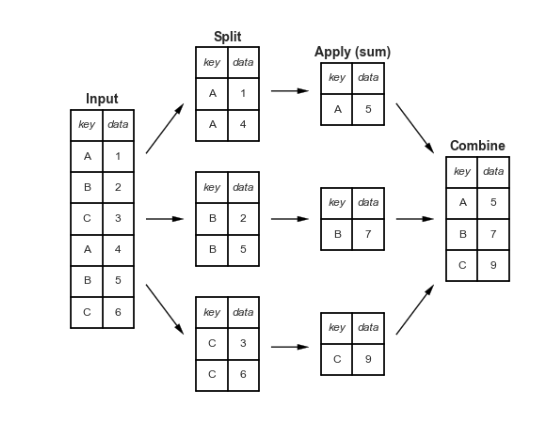

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

In [ ]:
display(df.groupby('key').sum())
display(df.groupby('key').mean())

**VanderPlas has an excellent introduction to groupby in Chapter 3 of his book, available at the below links:**

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb

We only touched on the most basic topics, and VanderPlas goes into great detail through the remainder of this notebook. We encourage you to use this supplemental material in your studies to learn about this function in greater detail.

**This concludes our introduction to some important pandas functions.**

**We encourage you to delve deeper into them, as you will be using all of these throughout this class and professionally in working with Python for Analytics.**

**We also highly encourage you to work through NB7 Part1, the FEC Dataset notebook, as is does a full analysis of 'real life' data from the Federal Election Commission, including application of most of the above functions that we have covered here.**